 Step 1: Import Libraries

In [14]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load and Clean Data

In [17]:
# Load dataset with appropriate encoding
data = pd.read_csv("C:/Users/MOHINI/Downloads/car_purchasing.csv", encoding='ISO-8859-1')

# Drop unnecessary columns
data = data.drop(columns=['customer name', 'customer e-mail', 'country'])

# Rename columns to snake_case
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]


Step 3: Detect Outliers

In [35]:
# Compute Z-scores
z_scores = np.abs(zscore(data))

# Boolean mask for rows with any feature Z-score > 3
outliers_mask = (z_scores > 3).any(axis=1)

# Number of outlier rows
num_outliers = outliers_mask.sum()
print(f"Number of outliers detected: {num_outliers}")

# Display first few outlier rows
outlier_rows = data[outliers_mask]
print(outlier_rows.head())

Number of outliers detected: 3
     gender        age  annual_salary  credit_card_debt    net_worth  \
194       0  70.000000    52323.24480      12438.856480  346555.1716   
221       1  36.408033    69494.69783      20000.000000  335809.6171   
270       0  35.375156    33422.99683       8570.611562  211168.6293   

     car_purchase_amount  
194          56229.41270  
221          37303.56701  
270          12536.93842  


Step 4: Handle Outliers

In [20]:
# Remove outliers using Z-score
z_scores = np.abs(zscore(data))
data = data[(z_scores < 3).all(axis=1)]


 Step 5: Feature Scaling

In [23]:
# Define features and target
X = data.drop("car_purchase_amount", axis=1)
y = data["car_purchase_amount"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 6: Train/Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 7: Model Training and Evaluation

In [29]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R² Score: {r2_score(y_test, preds):.2f}\n")


Linear Regression
RMSE: 1.59
R² Score: 1.00

Random Forest
RMSE: 2319.06
R² Score: 0.95

XGBoost
RMSE: 2164.36
R² Score: 0.96



Step 8: Visualization (for best model)

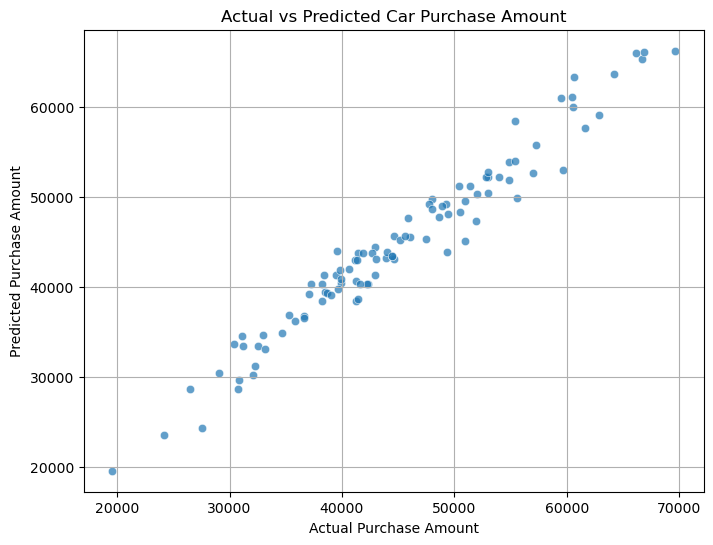

In [43]:
# Use XGBoost for visualization
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.grid(True)
plt.show()
